In [1]:
import pycisTopic
import pickle
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import os

%load_ext lab_black

In [2]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data.tsv"
):
    with open(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus.pkl",
        "rb",
    ) as f:
        cto = pickle.load(f)

    cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
    cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]

    cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
    cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

    df = cto.cell_data

    df.to_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data.tsv",
        sep="\t",
        index=True,
        header=True,
    )

# Integration evaluation using LISI

In [3]:
from harmonypy.lisi import compute_lisi
import seaborn as sns
import math
import os

In [4]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data_updated.tsv",
):
    df = pd.read_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data.tsv",
        sep="\t",
        index_col=0,
        header=0,
    )

    df["center"] = [x.split("_")[0] for x in df["sample_id"]]

    cto.cell_data["center"] = [x.split("_")[0] for x in cto.cell_data["sample_id"]]

    cto.cell_data["tech_center"] = cto.cell_data["tech"] + "_" + cto.cell_data["center"]

    df["tech_center"] = df["tech"] + "_" + df["center"]

    dimreduc_list = ["tSNE", "UMAP"]
    var_list = ["sample_id", "tech", "center", "tech_center", "consensus_cell_type"]

    for dimreduc in dimreduc_list:
        for var in var_list:
            if not f"{dimreduc}_LISI_by_{var}" in df.columns:
                lisi = compute_lisi(
                    cto.projections["cell"][dimreduc].to_numpy(),
                    metadata=cto.cell_data,
                    label_colnames=[var],
                )
                df[f"{dimreduc}_LISI_by_{var}"] = lisi
            else:
                print(f"{dimreduc}_LISI_by_{var} already in columns")

    df.to_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data_updated.tsv",
        sep="\t",
        index=True,
        header=True,
    )

# Plot

In [5]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus__cell_data_updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)
df["tech_center"] = df["tech"] + "_" + df["center"]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 's3atac_OHS'),
  Text(1, 0, '10xmultiome_SAN'),
  Text(2, 0, '10xv11_TXG'),
  Text(3, 0, '10xv11_CNA'),
  Text(4, 0, '10xv11_STA'),
  Text(5, 0, 'hydrop_CNA'),
  Text(6, 0, '10xv2_CNA'),
  Text(7, 0, 'hydrop_VIB'),
  Text(8, 0, '10xmultiome_VIB'),
  Text(9, 0, 'hydrop_EPF'),
  Text(10, 0, '10xv2_VIB'),
  Text(11, 0, 'ddseq_UCS'),
  Text(12, 0, 'ddseq_HAR'),
  Text(13, 0, '10xmultiome_CNA'),
  Text(14, 0, '10xv2_TXG'),
  Text(15, 0, 'ddseq_BIO'),
  Text(16, 0, 'mtscatac_MDC'),
  Text(17, 0, 'mtscatac_BRO'),
  Text(18, 0, '10xv1_VIB'),
  Text(19, 0, 'mtscatac_CNA')])

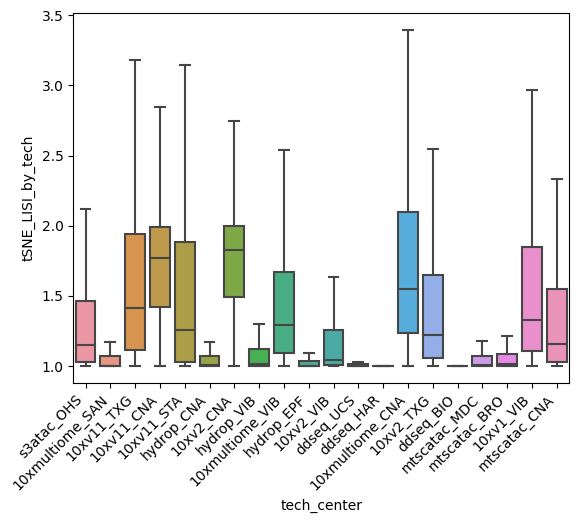

In [6]:
fix, ax = plt.subplots()
sns.boxplot(df, y="tSNE_LISI_by_tech", x="tech_center", showfliers=False, ax=ax)
plt.xticks(rotation=45, ha="right")

<AxesSubplot: xlabel='tSNE_1', ylabel='tSNE_2'>

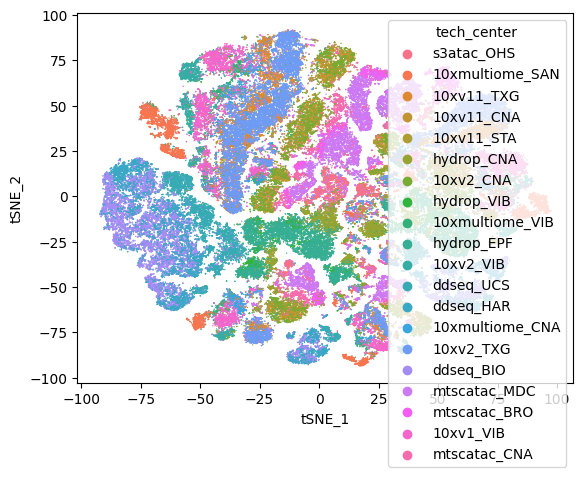

In [7]:
sns.scatterplot(df, x="tSNE_1", y="tSNE_2", s=1, linewidth=0, hue="tech_center")

In [8]:
df = pd.DataFrame(df[df.columns[-6:]].unstack()).reset_index()

In [9]:
df["sample"] = [x.split("___")[-1] for x in df["level_1"]]

In [10]:
df["tech"] = [x.split("_")[1] for x in df["sample"]]

<AxesSubplot: xlabel='level_0', ylabel='0'>

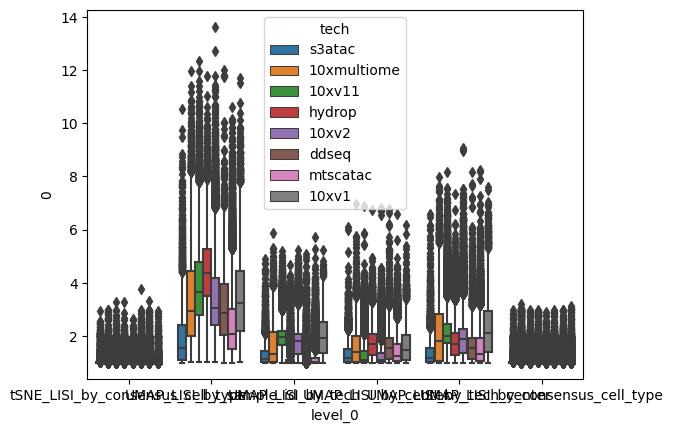

In [11]:
sns.boxplot(df, y=0, x="level_0", hue="tech")

<AxesSubplot: xlabel='tech', ylabel='0'>

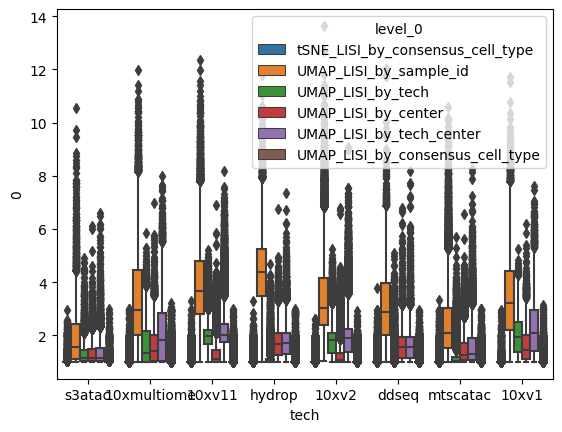

In [12]:
sns.boxplot(df, y=0, x="tech", hue="level_0")

# check with harmony

In [13]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data.tsv"
):
    with open(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl",
        "rb",
    ) as f:
        cto = pickle.load(f)

    cto.cell_data["UMAP_1"] = cto.projections["cell"]["UMAP"]["UMAP_1"]
    cto.cell_data["UMAP_2"] = cto.projections["cell"]["UMAP"]["UMAP_2"]

    cto.cell_data["tSNE_1"] = cto.projections["cell"]["tSNE"]["tSNE_1"]
    cto.cell_data["tSNE_2"] = cto.projections["cell"]["tSNE"]["tSNE_2"]

    cto.cell_data["UMAP_1_harmony"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_1"]
    cto.cell_data["UMAP_2_harmony"] = cto.projections["cell"]["UMAP_harmony"]["UMAP_2"]

    cto.cell_data["tSNE_1_harmony"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_1"]
    cto.cell_data["tSNE_2_harmony"] = cto.projections["cell"]["tSNE_harmony"]["tSNE_2"]

    df = cto.cell_data

    df.to_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data.tsv",
        sep="\t",
        index=True,
        header=True,
    )

In [14]:
txg_reduc_dict = {
    "s3atac": "s3atac",
    "10xmultiome": "10xmultiome",
    "10xv11": "10x",
    "hydrop": "hydrop",
    "10xv2": "10x",
    "ddseq": "ddseq",
    "mtscatac": "mtscatac",
    "10xv1": "10x",
}

In [15]:
dimreduc_list = ["tSNE", "UMAP", "tSNE_harmony", "UMAP_harmony"]
var_list = [
    "sample_id",
    "tech",
    "center",
    "tech_center",
    "harmony_consensus_cell_type__mega",
    "tech_reduc",
]

In [16]:
if not os.path.exists(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data_updated.tsv",
):
    df = pd.read_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data.tsv",
        sep="\t",
        index_col=0,
        header=0,
    )

    df["center"] = [x.split("_")[0] for x in df["sample_id"]]

    cto.cell_data["center"] = [x.split("_")[0] for x in cto.cell_data["sample_id"]]

    cto.cell_data["tech_center"] = cto.cell_data["tech"] + "_" + cto.cell_data["center"]

    df["tech_center"] = df["tech"] + "_" + df["center"]

    cto.cell_data["tech_reduc"] = [txg_reduc_dict[x] for x in cto.cell_data["tech"]]

    for dimreduc in dimreduc_list:
        for var in var_list:
            if not f"{dimreduc}_LISI_by_{var}" in df.columns:
                lisi = compute_lisi(
                    cto.projections["cell"][dimreduc].to_numpy(),
                    metadata=cto.cell_data,
                    label_colnames=[var],
                )
                df[f"{dimreduc}_LISI_by_{var}"] = lisi
            else:
                print(f"{dimreduc}_LISI_by_{var} already in columns")

    df.to_csv(
        "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data_updated.tsv",
        sep="\t",
        index=True,
        header=True,
    )

# plot


In [17]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data_updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

/tmp/ipykernel_1534141/3944776818.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [18]:
df.columns

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'tech', 'centre_tech',
       'Log_unique_nr_frag_in_regions', 'consensus_cell_type_individual',
       'seurat_cell_type_pred_score', 'cell_type__mega',
       'seurat_cell_type_pred_score__mega', 'consensus_cell_type__mega',
       'seurat_cell_type__mega', 'harmony_pycisTopic_leiden_10_3.0',
       'harmony_consensus_cell_type__mega', 'UMAP_1', 'UMAP_2', 'tSNE_1',
       'tSNE_2', 'UMAP_1_harmony', 'UMAP_2_harmony', 'tSNE_1_harmony',
       'tSNE_2_', 'tSNE_2_harmony', 'center', 'tech_center',
       'tSNE_LISI_by_sample

In [19]:
df_lisi = df[list([x for x in df.columns if "LISI" in x])]

In [20]:
df_lisi["sample"] = [x.split("___")[1].split(".")[0] for x in df_lisi.index]
df_lisi["tech"] = [x.split("_")[1] for x in df_lisi["sample"]]
df_lisi["centre"] = [x.split("_")[0] for x in df_lisi["sample"]]
df_lisi["tech_centre"] = df_lisi["tech"] + "_" + df_lisi["centre"]

/tmp/ipykernel_1534141/1015953491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lisi["sample"] = [x.split("___")[1].split(".")[0] for x in df_lisi.index]
/tmp/ipykernel_1534141/1015953491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lisi["tech"] = [x.split("_")[1] for x in df_lisi["sample"]]
/tmp/ipykernel_1534141/1015953491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [21]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

In [22]:
df_lisi.columns

Index(['tSNE_LISI_by_sample_id', 'tSNE_LISI_by_tech', 'tSNE_LISI_by_center',
       'tSNE_LISI_by_tech_center',
       'tSNE_LISI_by_harmony_consensus_cell_type__mega',
       'UMAP_LISI_by_harmony_consensus_cell_type__mega',
       'tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega',
       'UMAP_harmony_LISI_by_harmony_consensus_cell_type__mega',
       'tSNE_harmony_LISI_by_sample_id', 'tSNE_harmony_LISI_by_tech',
       'tSNE_harmony_LISI_by_center', 'tSNE_harmony_LISI_by_tech_center',
       'UMAP_harmony_LISI_by_sample_id', 'UMAP_harmony_LISI_by_tech',
       'UMAP_harmony_LISI_by_center', 'UMAP_harmony_LISI_by_tech_center',
       'tSNE_LISI_by_tech_reduc', 'UMAP_LISI_by_tech_reduc',
       'tSNE_harmony_LISI_by_tech_reduc', 'UMAP_harmony_LISI_by_tech_reduc',
       'UMAP_harmony_tech_reduc_LISI_by_tech_reduc',
       'tSNE_harmony_tech_reduc_LISI_by_tech_reduc', 'tSNE_LISI_by_fmx_sample',
       'UMAP_LISI_by_fmx_sample', 'tSNE_harmony_LISI_by_fmx_sample',
       'UMAP_har

In [23]:
reduc_alias_dict = {
    "s3atac": "s3atac",
    "10xmultiome": "10xmultiome",
    "10xv11": "10x",
    "hydrop": "hydrop",
    "10xv2": "10x",
    "ddseq": "ddseq",
    "mtscatac": "10xmtscatac",
    "10xv1": "10x",
}

In [24]:
df_lisi["tech_reduc"] = [reduc_alias_dict[x] for x in df["tech"]]

/tmp/ipykernel_1534141/1482337490.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lisi["tech_reduc"] = [reduc_alias_dict[x] for x in df["tech"]]


tSNE_LISI_by_sample_id


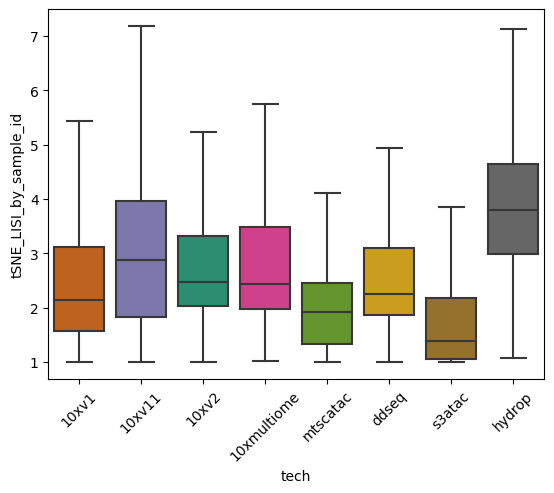

tSNE_LISI_by_tech


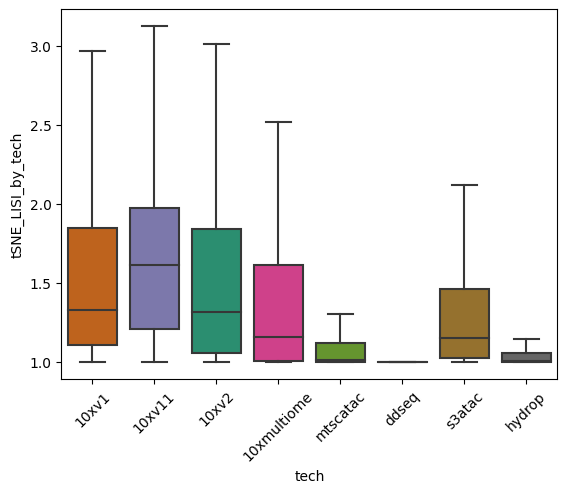

tSNE_LISI_by_center


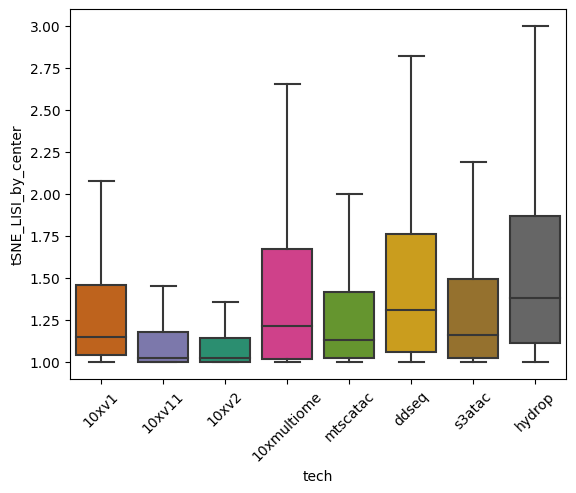

tSNE_LISI_by_tech_center


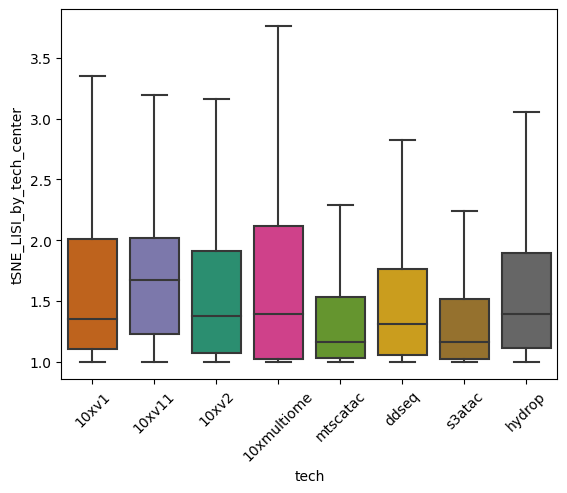

tSNE_LISI_by_harmony_consensus_cell_type__mega


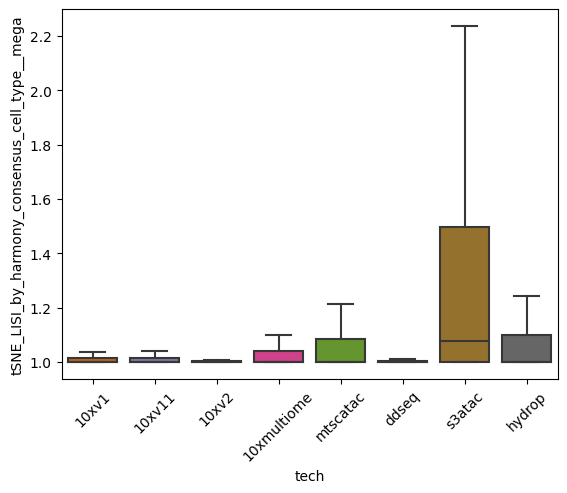

UMAP_LISI_by_harmony_consensus_cell_type__mega


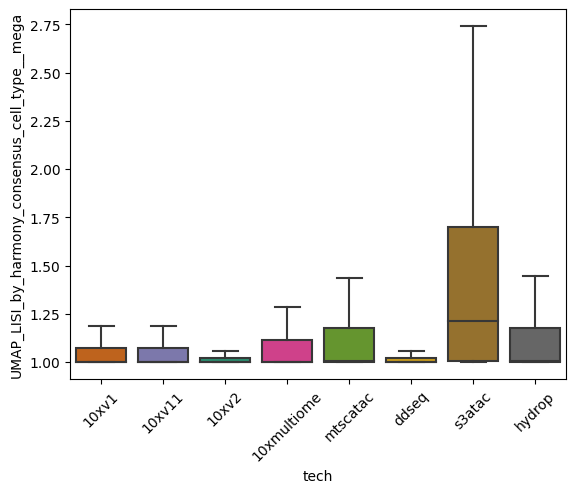

tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega


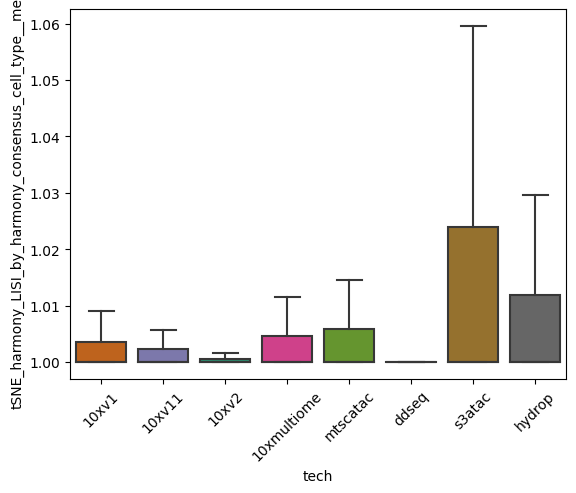

UMAP_harmony_LISI_by_harmony_consensus_cell_type__mega


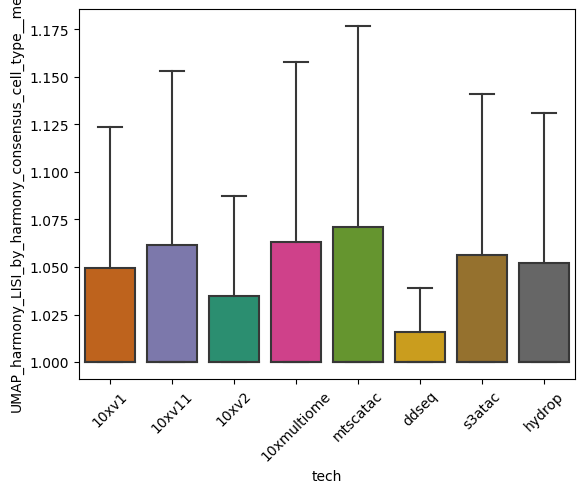

tSNE_harmony_LISI_by_sample_id


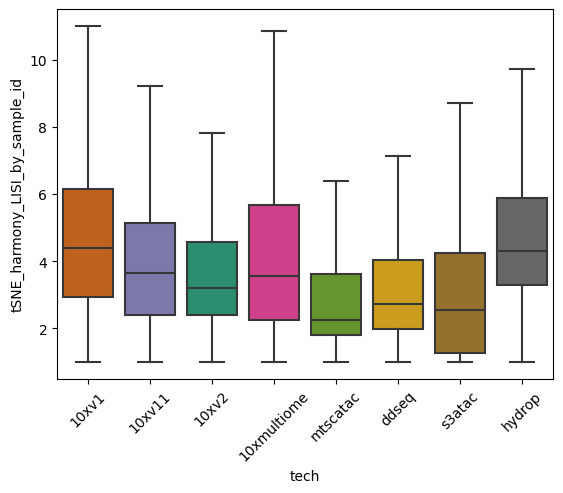

tSNE_harmony_LISI_by_tech


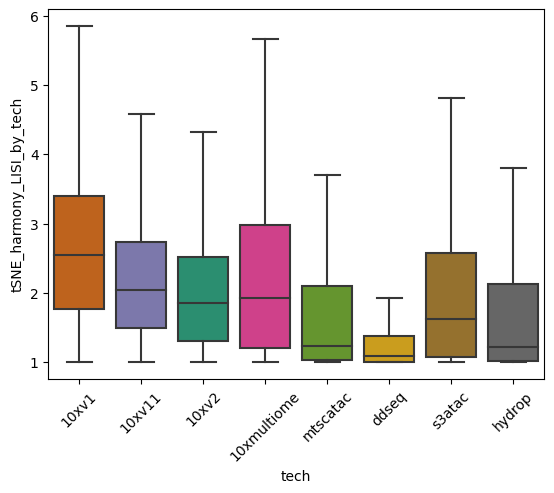

tSNE_harmony_LISI_by_center


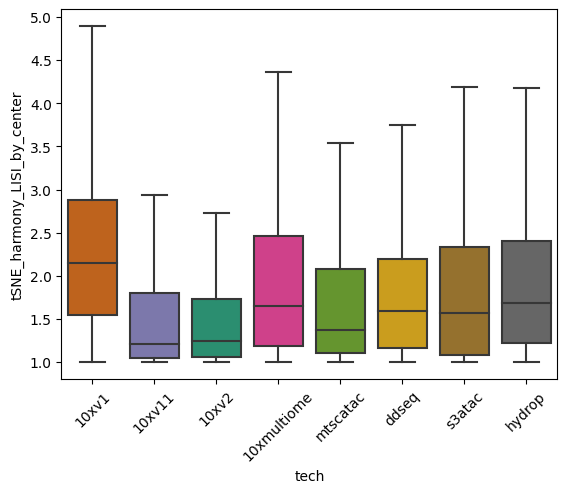

tSNE_harmony_LISI_by_tech_center


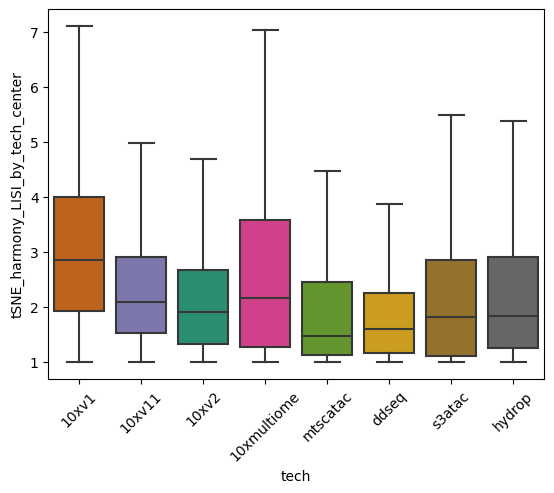

UMAP_harmony_LISI_by_sample_id


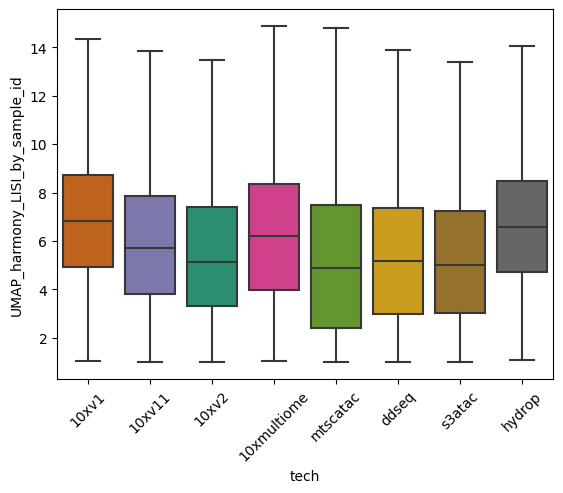

UMAP_harmony_LISI_by_tech


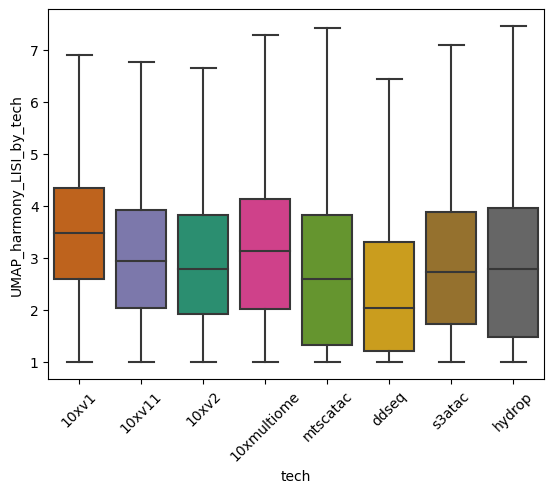

UMAP_harmony_LISI_by_center


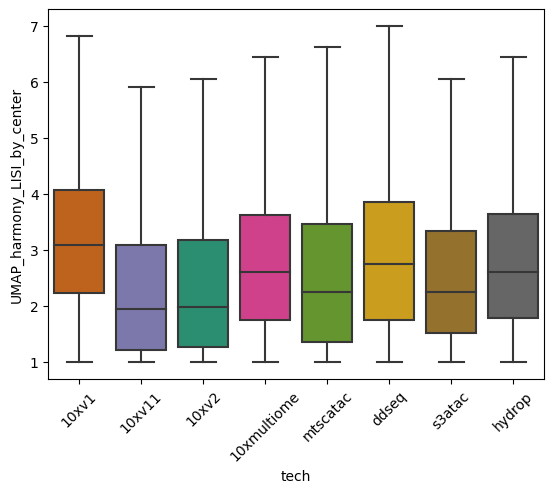

UMAP_harmony_LISI_by_tech_center


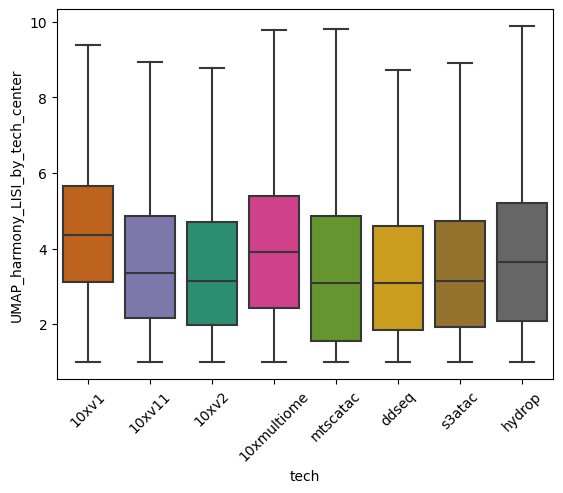

tSNE_LISI_by_tech_reduc


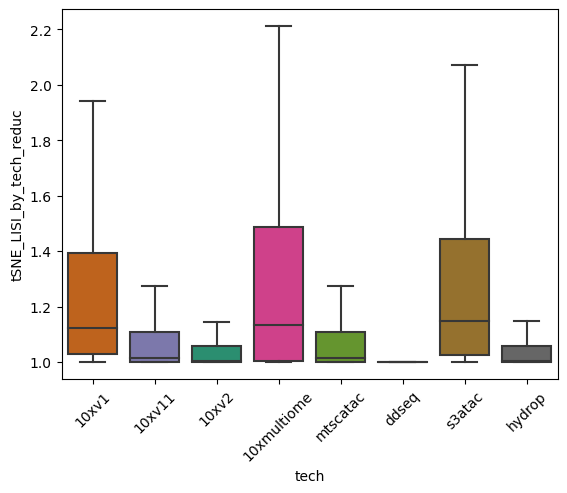

UMAP_LISI_by_tech_reduc


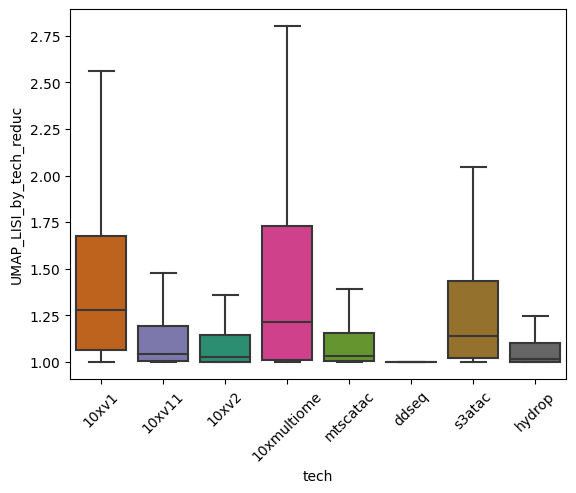

tSNE_harmony_LISI_by_tech_reduc


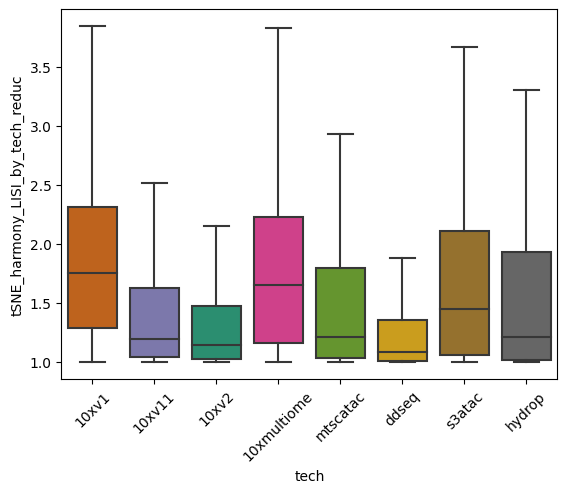

UMAP_harmony_LISI_by_tech_reduc


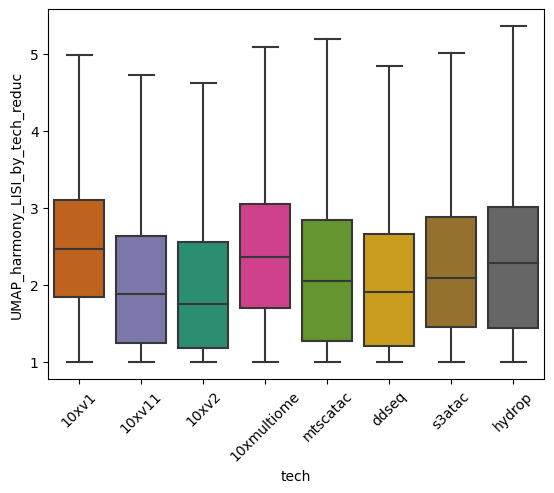

UMAP_harmony_tech_reduc_LISI_by_tech_reduc


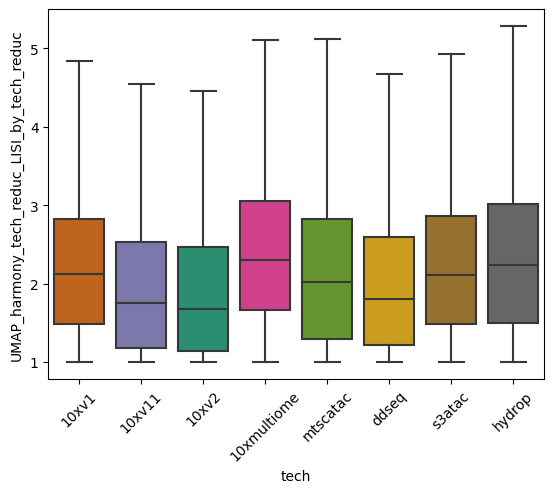

tSNE_harmony_tech_reduc_LISI_by_tech_reduc


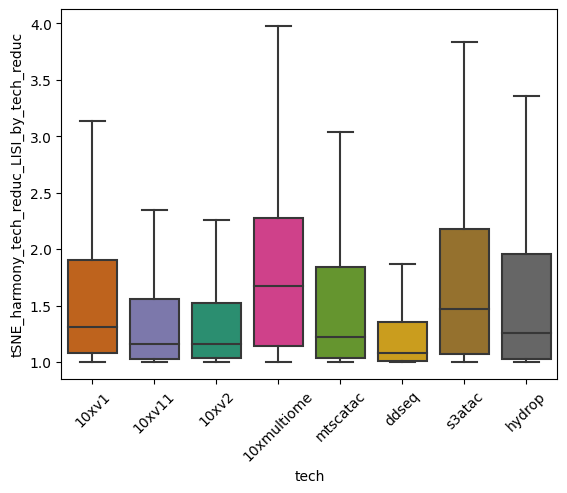

tSNE_LISI_by_fmx_sample


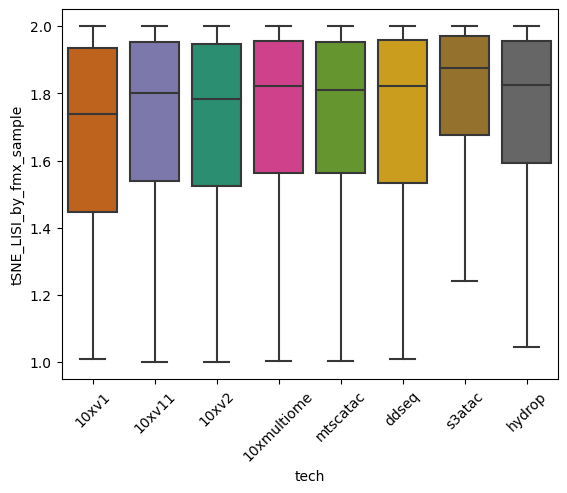

UMAP_LISI_by_fmx_sample


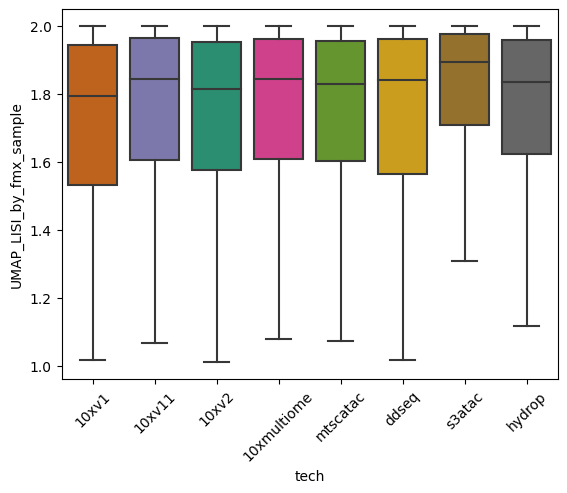

tSNE_harmony_LISI_by_fmx_sample


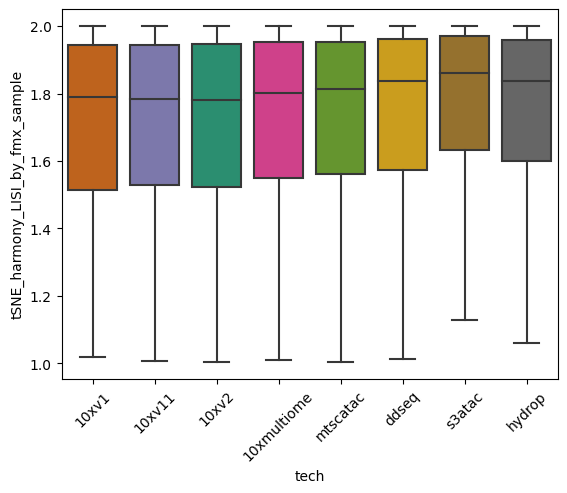

UMAP_harmony_LISI_by_fmx_sample


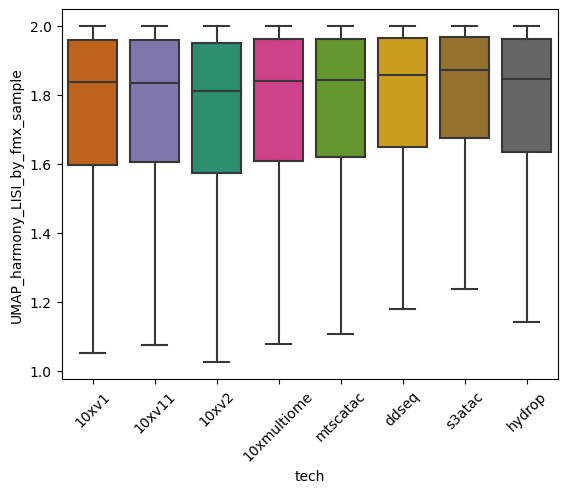

UMAP_harmony_tech_reduc_LISI_by_fmx_sample


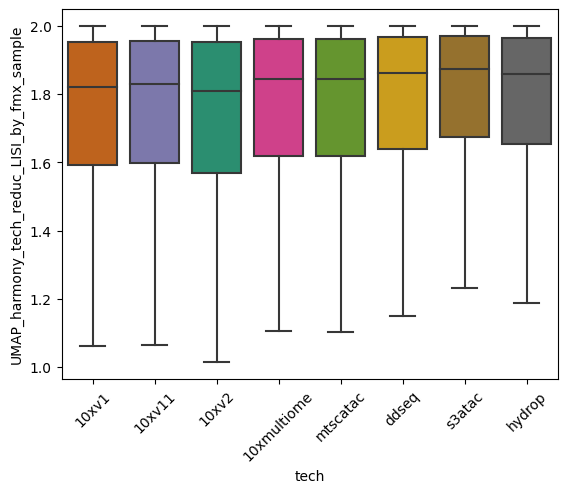

tSNE_harmony_tech_reduc_LISI_by_fmx_sample


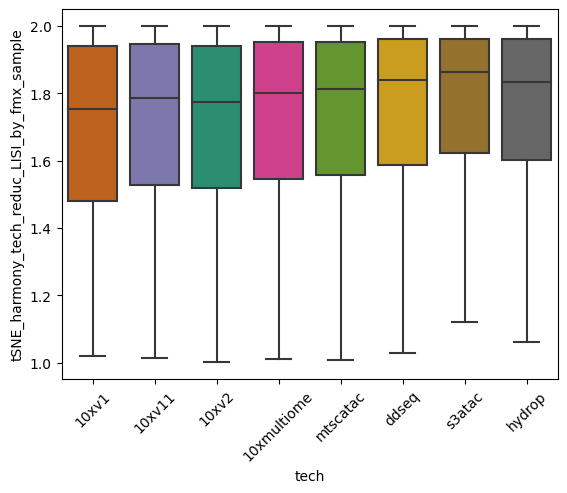

In [25]:
for contrast in list([x for x in df.columns if "LISI" in x]):
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech",
        showfliers=False,
        palette=tech_color_palette,
        order=tech_order,
    )
    plt.xticks(rotation=45)
    plt.show()

In [26]:
list([x for x in df.columns if "LISI" in x])

['tSNE_LISI_by_sample_id',
 'tSNE_LISI_by_tech',
 'tSNE_LISI_by_center',
 'tSNE_LISI_by_tech_center',
 'tSNE_LISI_by_harmony_consensus_cell_type__mega',
 'UMAP_LISI_by_harmony_consensus_cell_type__mega',
 'tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega',
 'UMAP_harmony_LISI_by_harmony_consensus_cell_type__mega',
 'tSNE_harmony_LISI_by_sample_id',
 'tSNE_harmony_LISI_by_tech',
 'tSNE_harmony_LISI_by_center',
 'tSNE_harmony_LISI_by_tech_center',
 'UMAP_harmony_LISI_by_sample_id',
 'UMAP_harmony_LISI_by_tech',
 'UMAP_harmony_LISI_by_center',
 'UMAP_harmony_LISI_by_tech_center',
 'tSNE_LISI_by_tech_reduc',
 'UMAP_LISI_by_tech_reduc',
 'tSNE_harmony_LISI_by_tech_reduc',
 'UMAP_harmony_LISI_by_tech_reduc',
 'UMAP_harmony_tech_reduc_LISI_by_tech_reduc',
 'tSNE_harmony_tech_reduc_LISI_by_tech_reduc',
 'tSNE_LISI_by_fmx_sample',
 'UMAP_LISI_by_fmx_sample',
 'tSNE_harmony_LISI_by_fmx_sample',
 'UMAP_harmony_LISI_by_fmx_sample',
 'UMAP_harmony_tech_reduc_LISI_by_fmx_sample',
 'tSNE_harmon

In [27]:
{x: x for x in df_lisi["tech_reduc"].unique()}

{'s3atac': 's3atac',
 '10xmultiome': '10xmultiome',
 '10x': '10x',
 'hydrop': 'hydrop',
 'ddseq': 'ddseq',
 '10xmtscatac': '10xmtscatac'}

In [28]:
tech_reduc_alias_dict = {
    "s3atac": "s3-ATAC",
    "10x": "10x",
    "hydrop": "HyDrop",
    "ddseq": "ddSEQ",
    "10xmultiome": "10x Multiome",
    "10xmtscatac": "mtscATAC",
}

In [29]:
df_lisi["tech_reduc_alias"] = [tech_reduc_alias_dict[x] for x in df_lisi["tech_reduc"]]

/tmp/ipykernel_1534141/2006813096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lisi["tech_reduc_alias"] = [tech_reduc_alias_dict[x] for x in df_lisi["tech_reduc"]]


In [30]:
tech_reduc_alias_order = [
    "10x",
    "10x Multiome",
    "mtscATAC",
    "ddSEQ",
    "HyDrop",
    "s3-ATAC",
]

In [31]:
tech_color_palette

{'10xv2': '#1b9e77',
 '10xv1': '#d95f02',
 '10xv11': '#7570b3',
 '10xmultiome': '#e7298a',
 'mtscatac': '#66a61e',
 'ddseq': '#e6ab02',
 's3atac': '#a6761d',
 'hydrop': '#666666'}

In [32]:
tech_reduc_alias_color_palette = {
    "10x": "#1b9e77",
    "ddSEQ": "#e6ab02",
    "HyDrop": "#666666",
    "s3-ATAC": "#a6761d",
    "mtscATAC": "#66a61e",
    "10x Multiome": "#e7298a",
}

In [33]:
tech_color_palette

{'10xv2': '#1b9e77',
 '10xv1': '#d95f02',
 '10xv11': '#7570b3',
 '10xmultiome': '#e7298a',
 'mtscatac': '#66a61e',
 'ddseq': '#e6ab02',
 's3atac': '#a6761d',
 'hydrop': '#666666'}

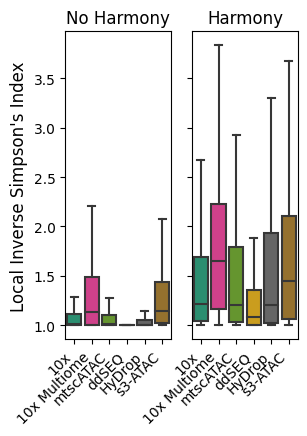

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(3, 4), sharey=True)

sns.boxplot(
    df_lisi,
    y="tSNE_LISI_by_tech_reduc",
    x="tech_reduc_alias",
    showfliers=False,
    palette=tech_reduc_alias_color_palette,
    order=tech_reduc_alias_order,
    ax=axes[0],
)
axes[0].set_xticklabels(tech_reduc_alias_order, rotation=45, ha="right")
axes[0].set_ylabel("Local Inverse Simpson's Index", fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("No Harmony")

sns.boxplot(
    df_lisi,
    y="tSNE_harmony_LISI_by_tech_reduc",
    x="tech_reduc_alias",
    showfliers=False,
    palette=tech_reduc_alias_color_palette,
    order=tech_reduc_alias_order,
    ax=axes[1],
)
axes[1].set_xticklabels(tech_reduc_alias_order, rotation=45, ha="right")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Harmony")

plt.savefig("plts_final/mainfig_lisi.png", dpi=300, facecolor="white")
plt.savefig("plts_final/mainfig_lisi.svg", dpi=300, facecolor="white")

In [35]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

In [36]:
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}
tech_alias_color_palette

{'10x v2': '#1b9e77',
 '10x v1': '#d95f02',
 '10x v1.1': '#7570b3',
 '10x Multiome': '#e7298a',
 'mtscATAC': '#66a61e',
 'ddSEQ': '#e6ab02',
 's3-ATAC': '#a6761d',
 'HyDrop': '#666666'}

In [37]:
df_lisi["tech_alias"] = [tech_alias_dict[x] for x in df_lisi["tech"]]

/tmp/ipykernel_1534141/1966372214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lisi["tech_alias"] = [tech_alias_dict[x] for x in df_lisi["tech"]]


In [38]:
df_lisi["tech"].unique()

array(['s3atac', '10xmultiome', '10xv11', 'hydrop', '10xv2', 'ddseq',
       'mtscatac', '10xv1'], dtype=object)

In [39]:
tech_alias_order = [tech_alias_dict[x] for x in tech_order]

In [40]:
tech_alias_order

['10x v1',
 '10x v1.1',
 '10x v2',
 '10x Multiome',
 'mtscATAC',
 'ddSEQ',
 's3-ATAC',
 'HyDrop']

In [41]:
df["tech_alias"].unique()

array(['s3-ATAC', '10x Multiome', '10x v1.1', 'HyDrop', '10x v2',
       'Bio-Rad ddSEQ SureCell', 'mtscATAC-seq', '10x v1'], dtype=object)

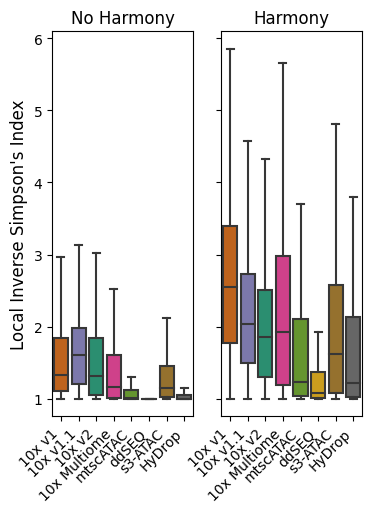

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(4, 5), sharey=True)

sns.boxplot(
    df_lisi,
    y="tSNE_LISI_by_tech",
    x="tech_alias",
    showfliers=False,
    palette=tech_alias_color_palette,
    order=tech_alias_order,
    ax=axes[0],
)
axes[0].set_xticklabels(tech_alias_order, rotation=45, ha="right")
axes[0].set_ylabel("Local Inverse Simpson's Index", fontsize=12)
axes[0].set_xlabel("")
axes[0].set_title("No Harmony")

sns.boxplot(
    df_lisi,
    y="tSNE_harmony_LISI_by_tech",
    x="tech_alias",
    showfliers=False,
    palette=tech_alias_color_palette,
    order=tech_alias_order,
    ax=axes[1],
)
axes[1].set_xticklabels(tech_alias_order, rotation=45, ha="right")
axes[1].set_ylabel("")
axes[1].set_xlabel("")
axes[1].set_title("Harmony")

plt.savefig("plts_final/mainfig_lisi_tech.png", dpi=300, facecolor="white")
plt.savefig("plts_final/mainfig_lisi_tech.svg", dpi=300, facecolor="white")

tSNE_LISI_by_tech_reduc


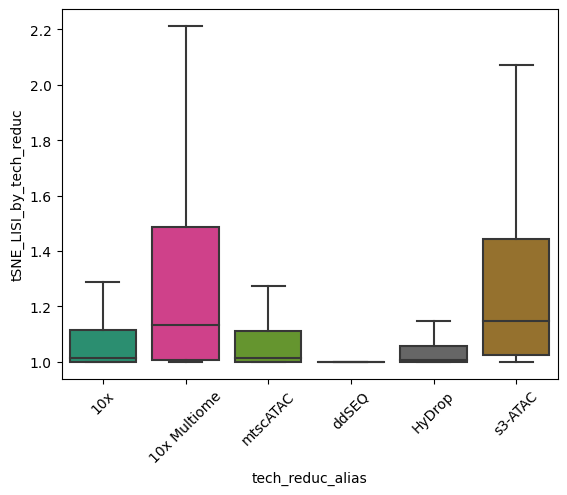

tSNE_harmony_LISI_by_tech_reduc


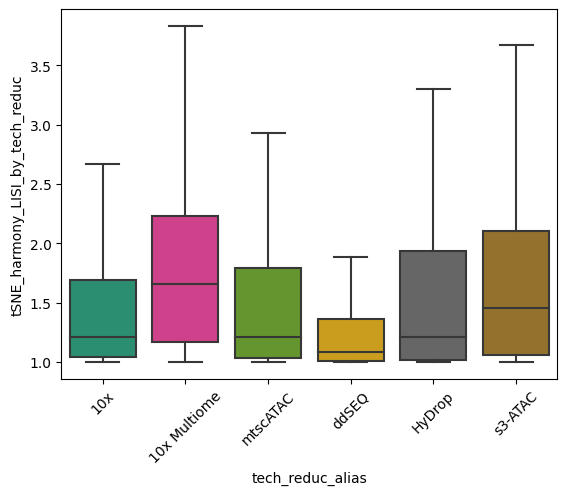

tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega


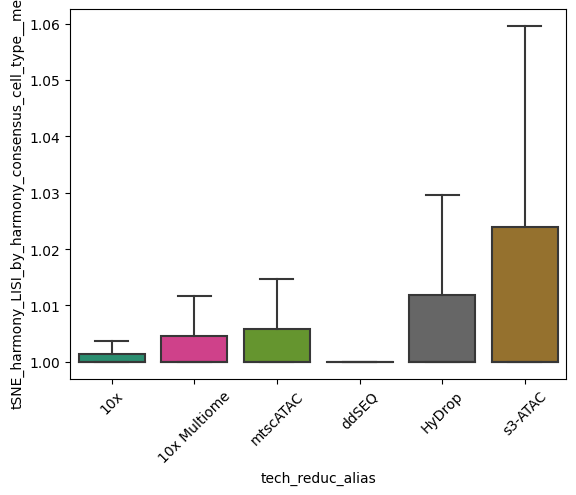

In [43]:
for contrast in [
    "tSNE_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega",
]:
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech_reduc_alias",
        showfliers=False,
        palette=tech_reduc_alias_color_palette,
        order=tech_reduc_alias_order,
    )
    plt.xticks(rotation=45)
    plt.show()

In [44]:
df_lisi_medians = (
    df_lisi[["tSNE_LISI_by_tech", "tSNE_harmony_LISI_by_tech", "sample", "tech"]]
    .groupby("sample")
    .median()
)

/tmp/ipykernel_1534141/752514121.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_lisi[["tSNE_LISI_by_tech", "tSNE_harmony_LISI_by_tech", "sample", "tech"]]


<AxesSubplot: ylabel='sample'>

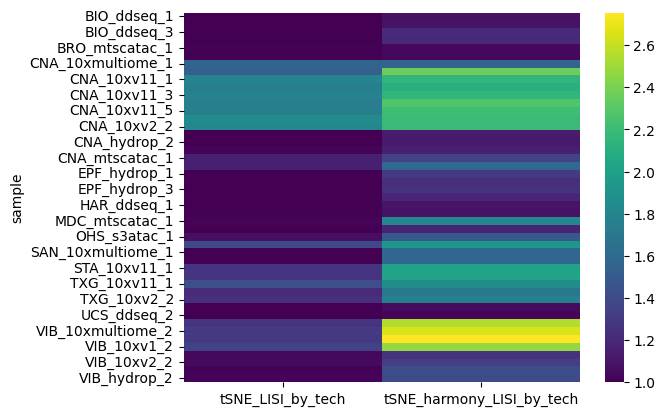

In [45]:
sns.heatmap(df_lisi_medians, cmap="viridis")

# re-calculate harmony

In [46]:
df = pd.read_csv(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data_updated.tsv",
    sep="\t",
    index_col=0,
    header=0,
)

/tmp/ipykernel_1534141/3944776818.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


In [47]:
with open(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.dimreduc.consensus_harmony.pkl",
    "rb",
) as f:
    cto = pickle.load(f)
    cto.cell_data = df

In [48]:
if not "tSNE_harmony_tech_reduc" in cto.projections["cell"].keys():
    from pycisTopic.clust_vis import harmony
    from pycisTopic.clust_vis import (
        find_clusters,
        run_umap,
        run_tsne,
        plot_metadata,
        plot_topic,
    )

    harmony(cto, "tech_reduc", random_state=555, max_iter_harmony=20)

    run_umap(cto, target="cell", reduction_name="UMAP_harmony_tech_reduc", harmony=True)
    run_tsne(cto, target="cell", reduction_name="tSNE_harmony_tech_reduc", harmony=True)

2023-03-10 09:16:54,954 - harmonypy - INFO - Iteration 1 of 20
2023-03-10 09:17:33,942 - harmonypy - INFO - Iteration 2 of 20
2023-03-10 09:18:14,685 - harmonypy - INFO - Iteration 3 of 20
2023-03-10 09:18:57,396 - harmonypy - INFO - Iteration 4 of 20
2023-03-10 09:19:38,801 - harmonypy - INFO - Iteration 5 of 20
2023-03-10 09:20:22,065 - harmonypy - INFO - Converged after 5 iterations


2023-03-10 09:20:22,097 cisTopic     INFO     Running UMAP
2023-03-10 09:22:48,611 cisTopic     INFO     Running FItSNE
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
Using ANNOY for knn search, with parameters: n_trees 50 and search_k 4500
Going to allocate memory. N: 169227, K: 90, N*K = 15230430
Building Annoy tree...
Done building tree. Beginning nearest neighbor search... 
parallel (72 threads):


In [49]:
dimreduc_list = [
    "tSNE",
    "UMAP",
    "tSNE_harmony",
    "UMAP_harmony",
    "UMAP_harmony_tech_reduc",
    "tSNE_harmony_tech_reduc",
]
var_list = ["fmx_sample"]

In [50]:
for dimreduc in dimreduc_list:
    for var in var_list:
        if not f"{dimreduc}_LISI_by_{var}" in df.columns:
            cell_data_subset = cto.cell_data.loc[~cto.cell_data[var].isna()]

            dimreduc_subset = cto.projections["cell"][dimreduc].loc[
                cell_data_subset.index
            ]
            lisi = compute_lisi(
                dimreduc_subset.to_numpy(),
                metadata=cell_data_subset,
                label_colnames=[var],
            )

            cell_data_subset[f"{dimreduc}_LISI_by_{var}"] = lisi
            df[f"{dimreduc}_LISI_by_{var}"] = cell_data_subset[
                f"{dimreduc}_LISI_by_{var}"
            ]
        else:
            print(f"{dimreduc}_LISI_by_{var} already in columns")

df.to_csv(
    "cistopic_objects_master/master_all_1.FIXEDCELLS__cto.scrublet0-4.fmx.singlets.model_24topics.consensus_harmony__cell_data_updated.tsv",
    sep="\t",
    index=True,
    header=True,
)

tSNE_LISI_by_fmx_sample already in columns
UMAP_LISI_by_fmx_sample already in columns
tSNE_harmony_LISI_by_fmx_sample already in columns
UMAP_harmony_LISI_by_fmx_sample already in columns
UMAP_harmony_tech_reduc_LISI_by_fmx_sample already in columns
tSNE_harmony_tech_reduc_LISI_by_fmx_sample already in columns


In [51]:
df_lisi = df[list([x for x in df.columns if "LISI" in x])]

df_lisi["sample"] = [x.split("___")[1].split(".")[0] for x in df_lisi.index]
df_lisi["tech"] = [x.split("_")[1] for x in df_lisi["sample"]]
df_lisi["centre"] = [x.split("_")[0] for x in df_lisi["sample"]]
df_lisi["tech_centre"] = df_lisi["tech"] + "_" + df_lisi["centre"]
df_lisi["harmony_consensus_cell_type__mega"] = cto.cell_data[
    "harmony_consensus_cell_type__mega"
]
df_lisi

tSNE_LISI_by_sample_id  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...                2.734731   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...                1.544987   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...                1.277939   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...                1.273969   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...                1.169641   
...                                                                    ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                      2.032893   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                      1.247061   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                      4.601218   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                      1.257324   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                      3.353042   

                                                    tSNE_LISI_by_tech  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...           1.412408   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...           1.302165   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...           1.047365   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...           1.271016   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...           1.143729   
...                                                               ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                 1.027830   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                 1.000000   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                 3.622713   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                 1.047320   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                 1.883161   

                                                    tSNE_LISI_by_center  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...             1.717714   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...             1.306901   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...             1.047447   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...             1.273933   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...             1.143763   
...                                                                 ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                   1.027920   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                   1.136992   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                   2.366860   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                   1.047331   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                   1.912504   

                                                    tSNE_LISI_by_tech_center  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...                  1.717714   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...                  1.309078   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...                  1.047493   
CTCTCTACTGAACGGCGTCTGCTTCC___OHS_s3atac_2.FIXED...                  1.273933   
ATTGAGGAAATGATGCTCCTGCTTCC___OHS_s3atac_2.FIXED...                  1.143822   
...                                                                      ...   
TTCTTAGACTTCTGAG___MDC_mtscatac_1.FIXEDCELLS                        1.027920   
CATCAGAACCCGGACT___MDC_mtscatac_1.FIXEDCELLS                        1.136992   
GAACCATACTACACTG___MDC_mtscatac_1.FIXEDCELLS                        3.834323   
CAGTTGATGGCACGCT___MDC_mtscatac_1.FIXEDCELLS                        1.047331   
ACCTCGTTGAGTTGAA___MDC_mtscatac_1.FIXEDCELLS                        1.913518   

                                                    tSNE_LISI_by_harmony_consensus_cell_type__mega  \
TCCTGAGCGAACGTCAGGGAACCGCG___OHS_s3atac_2.FIXED...                                        1.086969   
ACGCGACGACCGGAAGAAGCACGGAC___OHS_s3atac_2.FIXED...                                        1.170097   
GGTTAGTTCAAGTAGGACTATCGCAC___OHS_s3atac_2.FIXED...                    

tSNE_LISI_by_tech_reduc


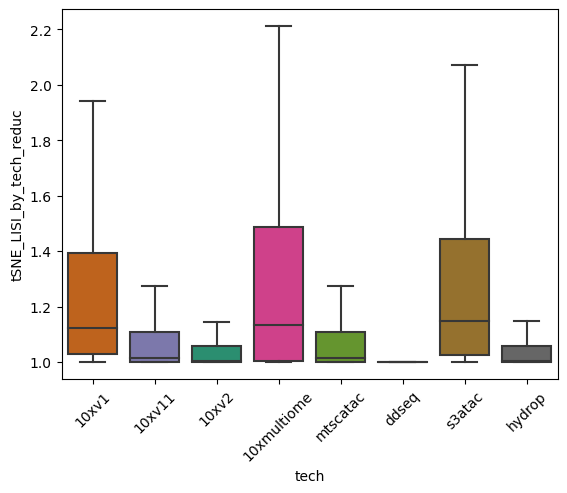

tSNE_harmony_LISI_by_tech_reduc


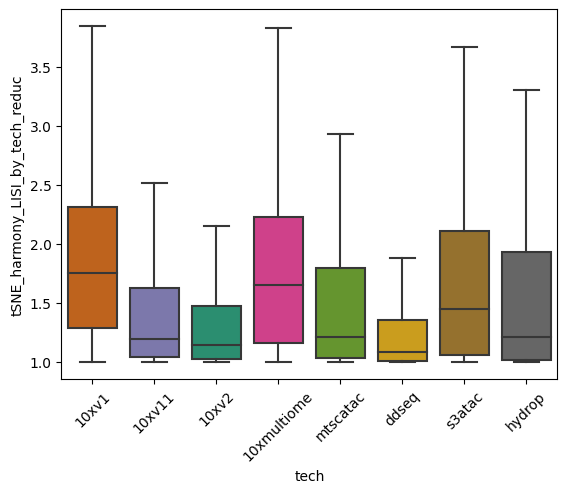

tSNE_harmony_tech_reduc_LISI_by_tech_reduc


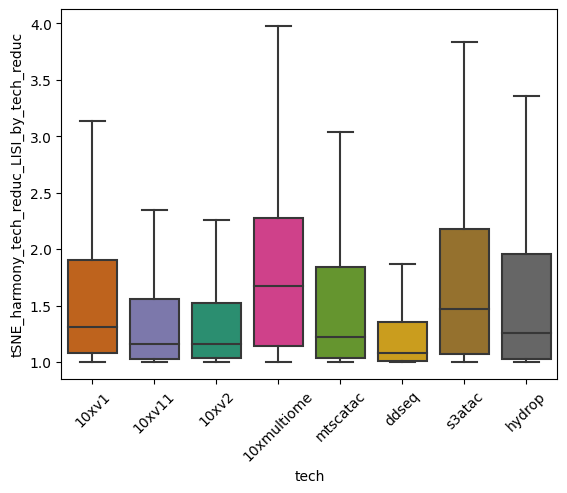

tSNE_harmony_tech_reduc_LISI_by_fmx_sample


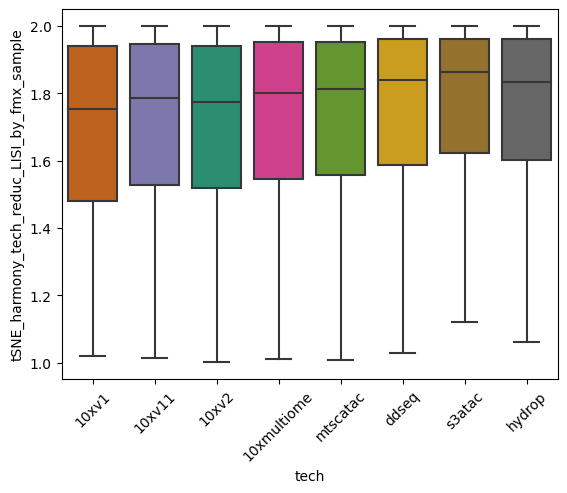

tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega


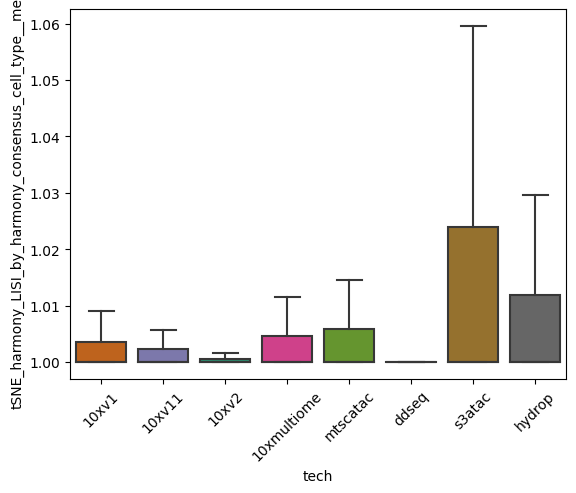

In [52]:
for contrast in [
    "tSNE_LISI_by_tech_reduc",
    "tSNE_harmony_LISI_by_tech_reduc",
    "tSNE_harmony_tech_reduc_LISI_by_tech_reduc",
    "tSNE_harmony_tech_reduc_LISI_by_fmx_sample",
    "tSNE_harmony_LISI_by_harmony_consensus_cell_type__mega",
]:
    print(contrast)
    sns.boxplot(
        df_lisi,
        y=contrast,
        x="tech",
        showfliers=False,
        palette=tech_color_palette,
        order=tech_order,
    )
    plt.xticks(rotation=45)
    plt.show()

# Plot tSNE

In [53]:
cto.cell_data = df

In [54]:
cto.cell_data["tSNE_1_harmony_tech_reduc"] = cto.projections["cell"][
    "tSNE_harmony_tech_reduc"
]["tSNE_1"]
cto.cell_data["tSNE_2_harmony_tech_reduc"] = cto.projections["cell"][
    "tSNE_harmony_tech_reduc"
]["tSNE_2"]

<AxesSubplot: xlabel='tSNE_1_harmony_tech_reduc', ylabel='tSNE_2_harmony_tech_reduc'>

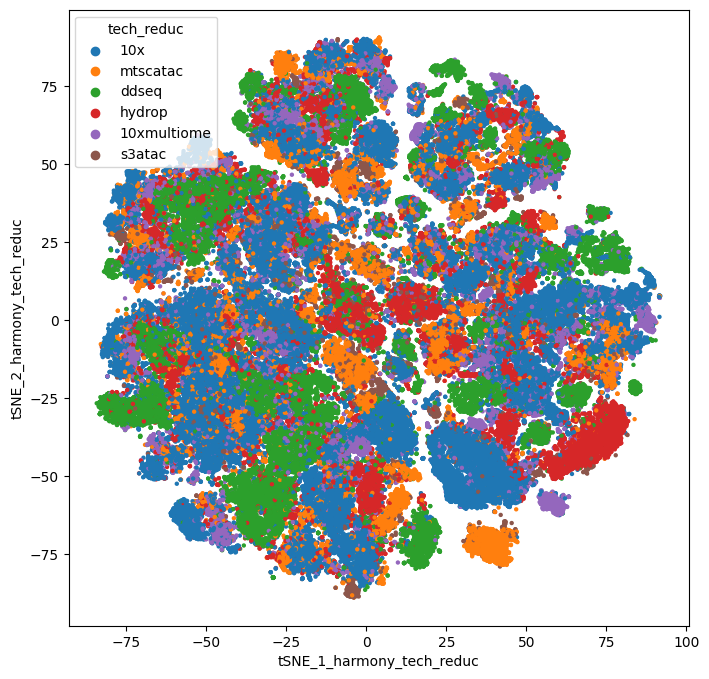

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(
    data=df.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_reduc",
    linewidth=0,
    ax=ax,
    s=10,
)

In [56]:
tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}
tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}
cell_type_color_dict = {
    "B_cell": "#88CCEE",
    "CD14+_monocyte": "#CC6677",
    "CD4+_T_cell": "#DDCC77",
    "Cytotoxic_T_cell": "#117733",
    "Dendritic_cell": "#332288",
    "Natural_killer_cell": "#AA4499",
    "CD16+_monocyte": "#44AA99",
}
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "Natural killer cells",
    "CD16+_monocyte": "CD16+ monocytes",
}
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]
cell_type_alias_order = [cell_type_alias_dict[x] for x in cell_type_order]
cell_type_alias_color_dict = {
    cell_type_alias_dict[x]: cell_type_color_dict[x]
    for x in cell_type_alias_dict.keys()
}
cell_type_alias_color_dict

{'B cells': '#88CCEE',
 'CD14+ monocytes': '#CC6677',
 'Naive T cells': '#DDCC77',
 'Cytotoxic T cells': '#117733',
 'Dendritic cells': '#332288',
 'Natural killer cells': '#AA4499',
 'CD16+ monocytes': '#44AA99'}

In [57]:
cell_type_alias_order

['B cells',
 'CD14+ monocytes',
 'Naive T cells',
 'Cytotoxic T cells',
 'Dendritic cells',
 'Natural killer cells',
 'CD16+ monocytes']

In [58]:
cto.cell_data["tech_alias"] = [tech_alias_dict[x] for x in cto.cell_data["tech"]]

In [59]:
cto.cell_data["harmony_consensus_cell_type__mega"] = [
    (x.replace("CD4+ T cell", "Naive T cell") + "s")
    .replace("ss", "s")
    .replace("ss", "s")
    for x in cto.cell_data["harmony_consensus_cell_type__mega"]
]

In [60]:
cto.cell_data["harmony_consensus_cell_type__mega"].unique()

array(['Cytotoxic T cells', 'Naive T cells', 'Natural killer cells',
       'CD14+ monocytes', 'B cells', 'CD16+ monocytes', 'Dendritic cells'],
      dtype=object)

In [61]:
cto.cell_data.columns

Index(['cisTopic_log_nr_frag', 'cisTopic_nr_frag', 'cisTopic_log_nr_acc',
       'cisTopic_nr_acc', 'Log_total_nr_frag', 'Log_unique_nr_frag',
       'Total_nr_frag', 'Unique_nr_frag', 'Dupl_nr_frag', 'Dupl_rate',
       'Total_nr_frag_in_regions', 'Unique_nr_frag_in_regions', 'FRIP',
       'TSS_enrichment', 'sample_id', 'barcode', 'Doublet_scores_fragments',
       'Predicted_doublets_fragments', 'fmx_droplet_type', 'fmx_sample',
       'pycisTopic_leiden_10_3.0', 'tech', 'centre_tech',
       'Log_unique_nr_frag_in_regions', 'consensus_cell_type_individual',
       'seurat_cell_type_pred_score', 'cell_type__mega',
       'seurat_cell_type_pred_score__mega', 'consensus_cell_type__mega',
       'seurat_cell_type__mega', 'harmony_pycisTopic_leiden_10_3.0',
       'harmony_consensus_cell_type__mega', 'UMAP_1', 'UMAP_2', 'tSNE_1',
       'tSNE_2', 'UMAP_1_harmony', 'UMAP_2_harmony', 'tSNE_1_harmony',
       'tSNE_2_', 'tSNE_2_harmony', 'center', 'tech_center',
       'tSNE_LISI_by_sample

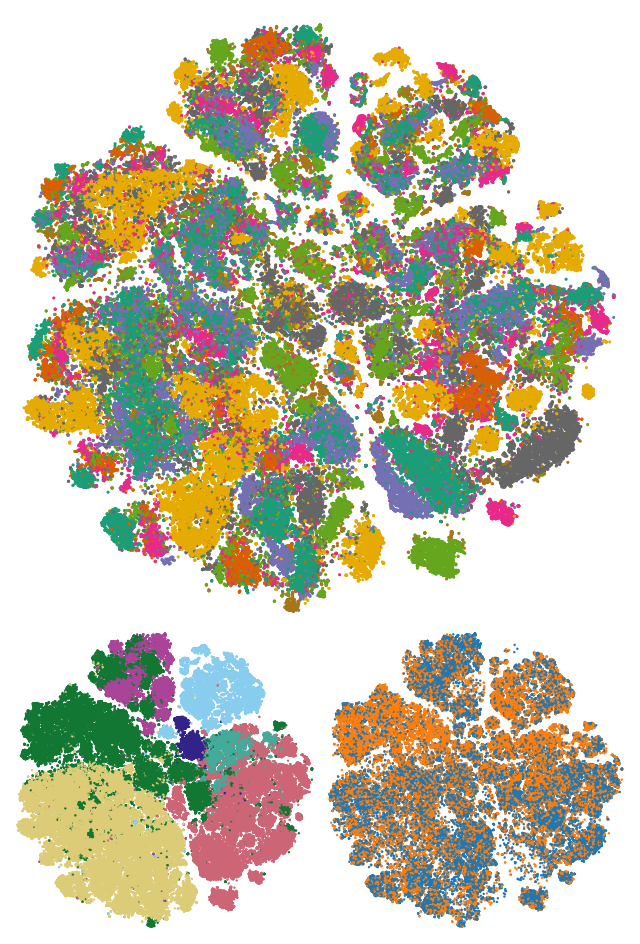

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=5,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="harmony_consensus_cell_type__mega",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=3,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=3,
    alpha=1,
    legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_1_harmony_tech_reduc"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_2_harmony_tech_reduc"].max() * 1.05,
        )
    )
plt.savefig("plts_final/tSNE_harmony_tech_reduc_mainfig.png", dpi=900, facecolor=None)
plt.show()

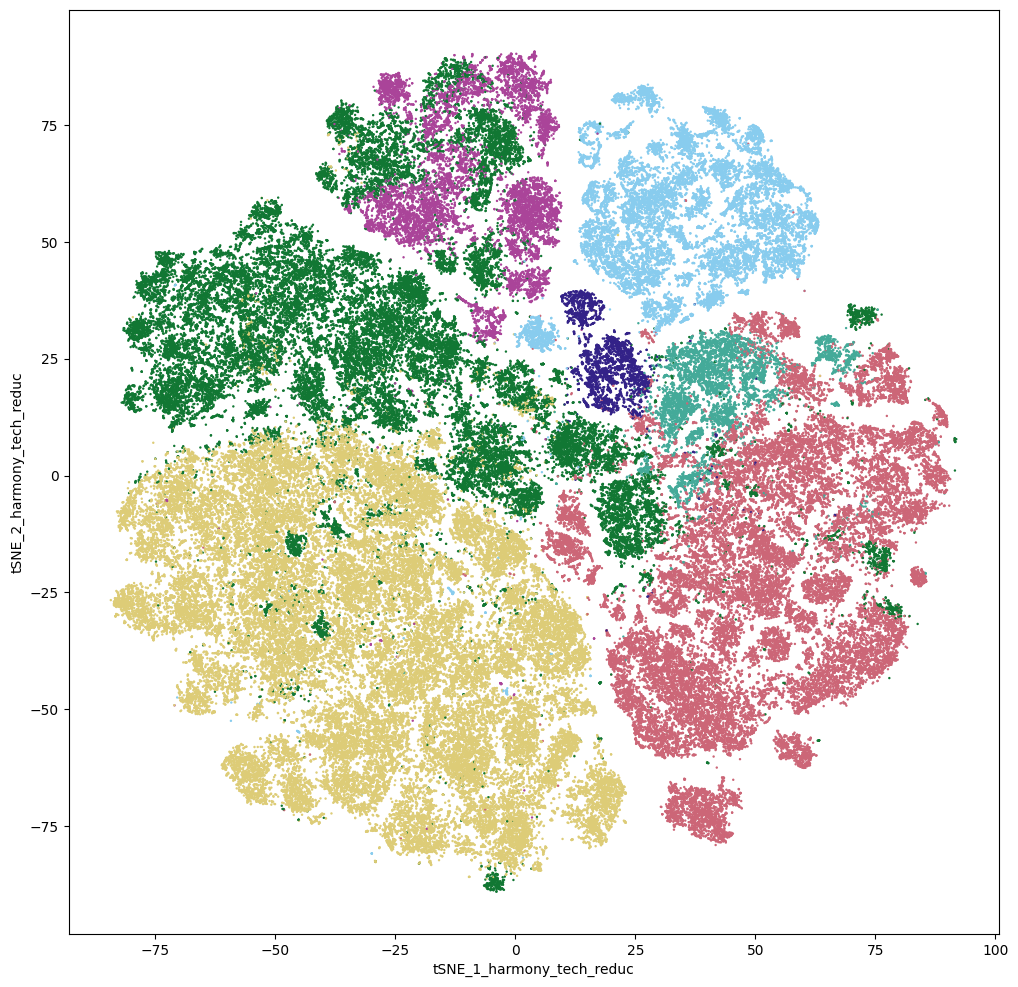

In [91]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="harmony_consensus_cell_type__mega",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax,
    s=3,
    alpha=1,
    legend=False,
)
plt.savefig("test.png", dpi=600)

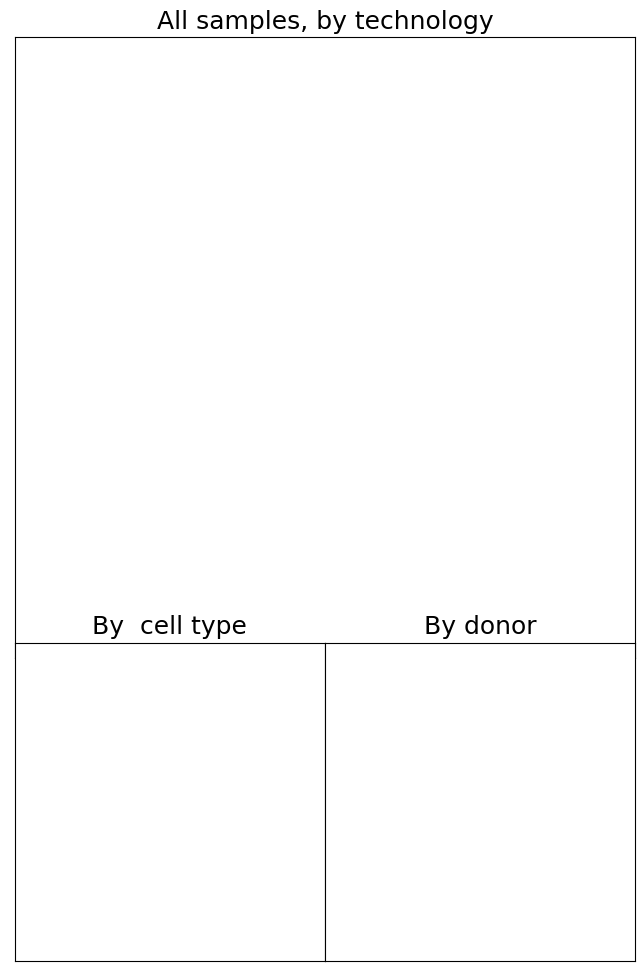

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=-0.05, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
# ax4 = fig.add_subplot(gs[2, -1])

# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1",
#     y="tSNE_2",
#     hue="tech_alias",
#     palette=tech_alias_color_palette,
#     hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax1,
#     s=5,
#     alpha=1,
#     legend=False,
# )
# sns.despine(left=True, bottom=True)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1",
#     y="tSNE_2",
#     hue="harmony_consensus_cell_type__mega",
#     palette=cell_type_alias_color_dict,
#     hue_order=cell_type_alias_order,
#     linewidth=0,
#     ax=ax2,
#     s=3,
#     alpha=1,
#     legend=False,
# )
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1",
#     y="tSNE_2",
#     hue="fmx_sample",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax3,
#     s=3,
#     alpha=1,
#     legend=False,
# )
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2"].min() * 1.05,
            cto.cell_data["tSNE_2"].max() * 1.05,
        )
    )
ax1.set_title("All samples, by technology", fontsize=18)
ax2.set_title("By  cell type", fontsize=18)
ax3.set_title("By donor", fontsize=18)
plt.savefig("plts_final/tSNE_mainfig_axes.svg", dpi=900, facecolor=None)
plt.show()

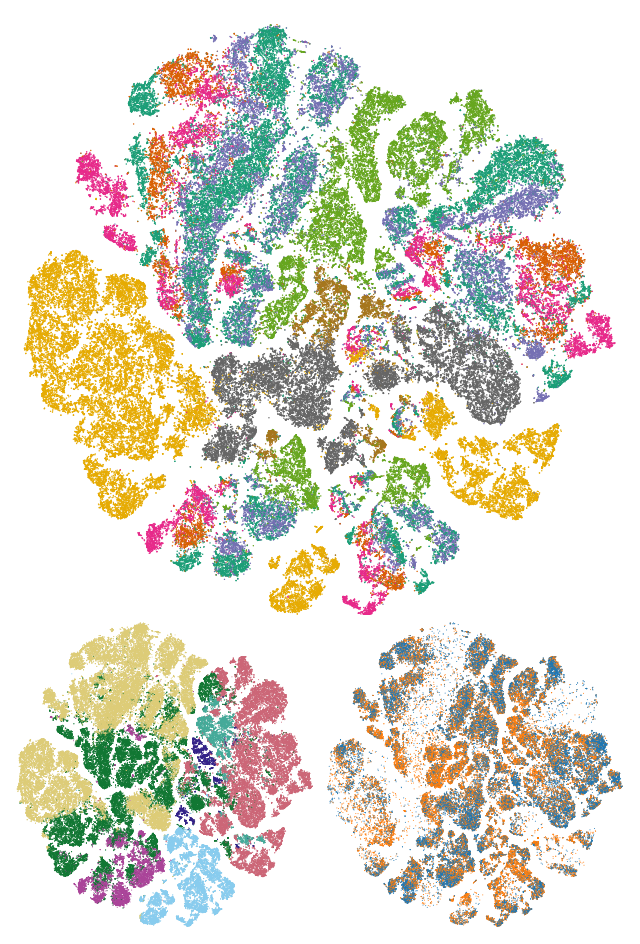

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=-0.05, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=1,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="harmony_consensus_cell_type__mega",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=0.5,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=0.5,
    alpha=1,
    legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2"].min() * 1.05,
            cto.cell_data["tSNE_2"].max() * 1.05,
        )
    )
# ax1.set_title("All samples, by technology", fontsize=18)
# ax2.set_title("By  cell type", fontsize=18)
# ax3.set_title("By donor", fontsize=18)
plt.savefig("plts_final/tSNE_mainfig.png", dpi=900, facecolor=None)
plt.show()

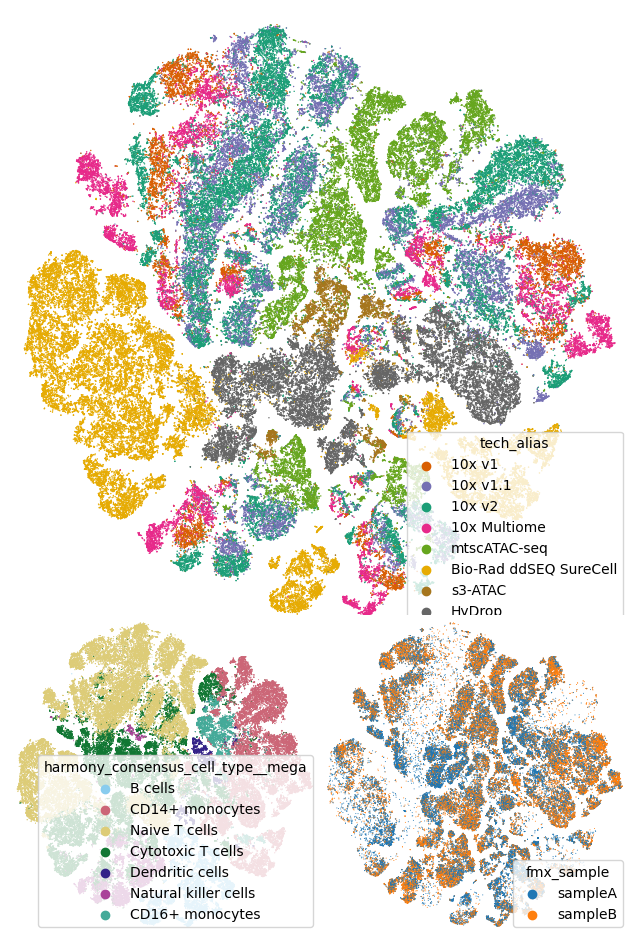

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=-0.05, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[:-1, :])
ax2 = fig.add_subplot(gs[-1, 0])
ax3 = fig.add_subplot(gs[-1, 1])
# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=1,
    alpha=1,
    # legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="harmony_consensus_cell_type__mega",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=0.5,
    alpha=1,
    # legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="fmx_sample",
    # palette=tech_alias_color_palette,
    # hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=0.5,
    alpha=1,
    # legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2, ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2"].min() * 1.05,
            cto.cell_data["tSNE_2"].max() * 1.05,
        )
    )
# ax1.set_title("All samples, by technology", fontsize=18)
# ax2.set_title("By  cell type", fontsize=18)
# ax3.set_title("By donor", fontsize=18)
# plt.savefig("plts_final/tSNE_mainfig.png", dpi=900, facecolor=None)
plt.show()

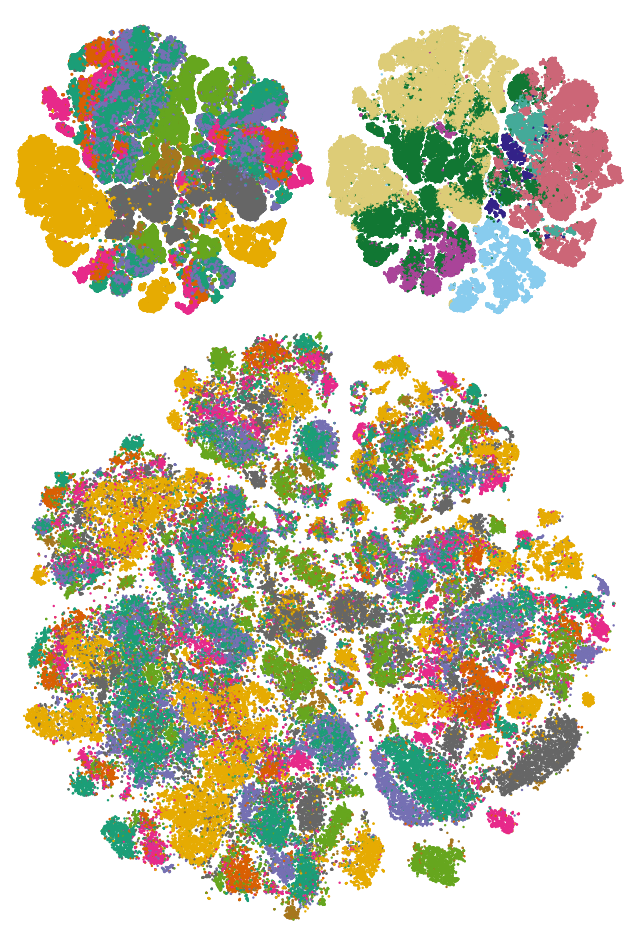

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

# plot it
fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(
    3, 2, hspace=0, wspace=0
)  # , width_ratios=[3, 1], height_ratios=[1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1:, 0:])

# ax4 = fig.add_subplot(gs[2, -1])

sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax1,
    s=5,
    alpha=1,
    legend=False,
)
sns.despine(left=True, bottom=True)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1",
    y="tSNE_2",
    hue="harmony_consensus_cell_type__mega",
    palette=cell_type_alias_color_dict,
    hue_order=cell_type_alias_order,
    linewidth=0,
    ax=ax2,
    s=3,
    alpha=1,
    legend=False,
)
sns.scatterplot(
    data=cto.cell_data.sample(frac=1),
    x="tSNE_1_harmony_tech_reduc",
    y="tSNE_2_harmony_tech_reduc",
    hue="tech_alias",
    palette=tech_alias_color_palette,
    hue_order=tech_alias_order,
    linewidth=0,
    ax=ax3,
    s=3,
    alpha=1,
    legend=False,
)
# sns.scatterplot(
#     data=cto.cell_data.sample(frac=1),
#     x="tSNE_1_harmony_tech_reduc",
#     y="tSNE_2_harmony_tech_reduc",
#     hue="tech_alias",
#     # palette=tech_alias_color_palette,
#     # hue_order=tech_alias_order,
#     linewidth=0,
#     ax=ax4,
#     s=5,
#     alpha=1,
#     legend=False,
# )
for ax in [ax1, ax2]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_1"].min() * 1.05,
            cto.cell_data["tSNE_1"].max() * 1.05,
        )
    )
for ax in [ax3]:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(
        (
            cto.cell_data["tSNE_1_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_1_harmony_tech_reduc"].max() * 1.05,
        )
    )
    ax.set_ylim(
        (
            cto.cell_data["tSNE_2_harmony_tech_reduc"].min() * 1.05,
            cto.cell_data["tSNE_2_harmony_tech_reduc"].max() * 1.05,
        )
    )
plt.savefig("plts_final/tSNE_harmony_tech_reduc_mainfig.png", dpi=900, facecolor=None)
plt.show()

# check lisis by cell type

In [66]:
df_lisi["harmony_consensus_cell_type__mega"] = cto.cell_data[
    "harmony_consensus_cell_type__mega"
]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 's3atac'),
  Text(1, 0, '10xmultiome'),
  Text(2, 0, '10xv11'),
  Text(3, 0, 'hydrop'),
  Text(4, 0, '10xv2'),
  Text(5, 0, 'ddseq'),
  Text(6, 0, 'mtscatac'),
  Text(7, 0, '10xv1')])

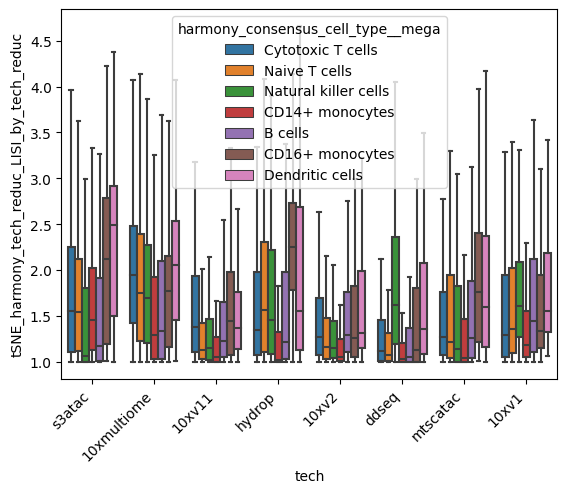

In [67]:
sns.boxplot(
    df_lisi,
    x="tech",
    y="tSNE_harmony_tech_reduc_LISI_by_tech_reduc",
    hue="harmony_consensus_cell_type__mega",
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Cytotoxic T cells'),
  Text(1, 0, 'Naive T cells'),
  Text(2, 0, 'Natural killer cells'),
  Text(3, 0, 'CD14+ monocytes'),
  Text(4, 0, 'B cells'),
  Text(5, 0, 'CD16+ monocytes'),
  Text(6, 0, 'Dendritic cells')])

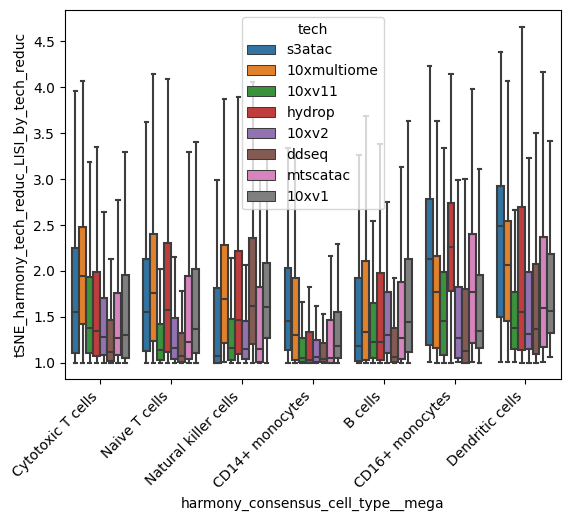

In [68]:
sns.boxplot(
    df_lisi,
    x="harmony_consensus_cell_type__mega",
    y="tSNE_harmony_tech_reduc_LISI_by_tech_reduc",
    hue="tech",
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Cytotoxic T cells'),
  Text(1, 0, 'Naive T cells'),
  Text(2, 0, 'Natural killer cells'),
  Text(3, 0, 'CD14+ monocytes'),
  Text(4, 0, 'B cells'),
  Text(5, 0, 'CD16+ monocytes'),
  Text(6, 0, 'Dendritic cells')])

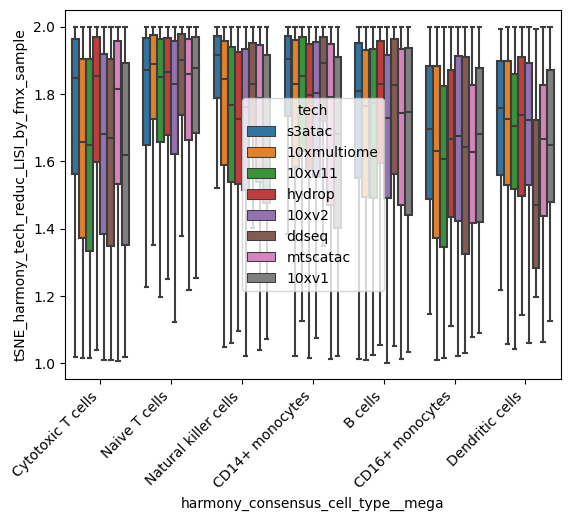

In [69]:
sns.boxplot(
    df_lisi,
    x="harmony_consensus_cell_type__mega",
    y="tSNE_harmony_tech_reduc_LISI_by_fmx_sample",
    hue="tech",
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

In [70]:
df_lisi.groupby(["tech", "seurat_cell_type__mega"])[
    "tSNE_harmony_tech_reduc_LISI_by_fmx_sample"
].median()

KeyError: 'seurat_cell_type__mega'

In [ ]:
df_lisi["seurat_cell_type__mega"] = cto.cell_data["seurat_cell_type__mega"]
df_lisi_pivot = (
    df_lisi.groupby(["tech", "harmony_consensus_cell_type__mega"])[
        "tSNE_harmony_tech_reduc_LISI_by_fmx_sample"
    ]
    .median()
    .reset_index()
    .pivot(index="tech", columns="harmony_consensus_cell_type__mega")
)

In [ ]:
sns.heatmap(data=df_lisi_pivot, cmap="viridis", annot=df_lisi_pivot, fmt=".2f")

In [ ]:
df_heatmap = (
    df_lisi.groupby(["sample", "harmony_consensus_cell_type__mega"])[
        "UMAP_harmony_tech_reduc_LISI_by_tech_reduc"
    ]
    .median()
    .reset_index()
)
df_heatmap